In [1]:
%load_ext autoreload
%autoreload 2 

# Set path to find modelling tools for later use
import os
import sys
sys.path.append(os.path.join(os.getcwd(),".."))
import pandas as pd

from IPython.display import display
from src.preprocess import preprocessMRC
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../data/MRC/MRCData-processed-interpolated.csv")

/Users/nd/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
proc = preprocessMRC()
out = proc(include_time=False, which_attempt=1)

	Medical Research Council funded PD copy-typing data.

Removal of sentences with 'high' Levenshtein distance...

Size of dataframe before row pruning: (433672, 12)
Size of dataframe after row pruning: (433411, 12)

Removal of sentences with left/right arrows keys...

Size of dataframe before row pruning: (433411, 12)
Size of dataframe after row pruning: (414321, 12)
Using mode: MRC_MODE

Total number of study subjects: 154
Number of sentences typed by PD patients: 343
Number of sentences typed by controls: 1862
Average sentence length: 120.06
Minimum sentence length: 53
Maximum sentence length: 229


In [45]:
out.head()

,Participant_ID,Diagnosis,Sentence_ID,Preprocessed_typed_sentence,locations,IKI_timings,PPTS_list,hold_time
0,12,1,9,lincoln's coffin would be encased in concrete ...,0000000000000000000000000000000000000000000000...,"[1408.0250000000233, 423.8649999999907, 1040.0...","[l, i, n, c, o, l, n, ', s, , c, o, f, f, i, ...","[103.9199999999255, 543.9699999999721, 208.084..."
1,12,1,11,"hpωowever, there is no evidence tha;ωt those t...",0000000000000000000000000000000000000000000000...,"[800.035000000149, 8215.85999999987, 1136.0, 1...","[h, p, ω, o, w, e, v, e, r, ,, , t, h, e, r, ...","[199.91500000003725, 247.9199999999255, 200.02..."
2,12,1,13,over three million cattle are residents of the...,0000000000000000000000000000000000000000000000...,"[1071.9950000001118, 568.0149999998976, 760.11...","[o, v, e, r, , t, h, r, e, e, , m, i, l, l, ...","[200.19999999995343, 192.09499999997206, 240.1..."
3,12,1,14,the koreeωan men have not fared so well in oly...,0000000000000000000000000000000000000000000000...,"[1024.0200000000186, 207.91500000003725, 312.0...","[t, h, e, , k, o, r, e, e, ω, a, n, , m, e, ...","[175.90500000002794, 231.9199999999255, 200.08..."
4,12,1,15,sωsplit-finger aiming ωrequires the archer to...,0000000000000000000000000000000000000000000000...,"[1935.5600000000559, 4671.685000000056, 2680.2...","[s, ω, s, p, l, i, t, -, f, i, n, g, e, r, , ...","[335.61000000010245, 159.90999999991618, 240.2..."


In [42]:
len(out.loc[(out.Participant_ID == 12) & (out.Sentence_ID == "9")].hold_time.tolist()[0])

127

In [43]:
len(out.loc[(out.Participant_ID == 12) & (out.Sentence_ID == "9")].IKI_timings.tolist()[0])

126

In [44]:
len(out.loc[(out.Participant_ID == 12) & (out.Sentence_ID == "9")].Preprocessed_typed_sentence.tolist()[0])

127

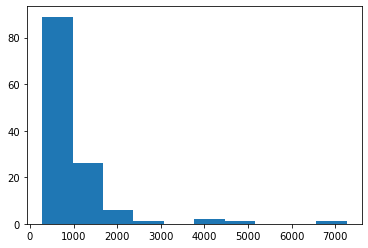

In [59]:
# Old IKI calcs
plt.hist(np.array(out.loc[(out.Participant_ID == 12) & (out.Sentence_ID == "9")].IKI_timings.tolist()[0]))
plt.show()

## New processing for MRC

In [2]:
from src.preprocess import preprocessMRC, create_MRC_dataset, create_char_data
from pathlib import Path

In [3]:
df = pd.read_pickle(Path("../data/MRC") / 'preproc_mrc_halfway.pkl')

In [ ]:
outt = create_char_data(df)

In [8]:
df.head()

,key,location,participant_id,sentence_id,diagnosis,medication,keydown,keyup
0,l,0,12,9,1,0,613554.525,613658.445
1,i,0,12,9,1,0,614962.550,615506.520
2,n,0,12,9,1,0,615386.415,615594.500
3,c,0,12,9,1,0,616426.490,616650.710
4,o,0,12,9,1,0,616770.585,616938.595


In [12]:
coordinates = (df.participant_id == 12) & (df.sentence_id == 9)
# df.loc[coordinates].keyup.values - df.loc[coordinates].keydown.values
len(df.loc[coordinates].keydown[1:].values - df.loc[coordinates].keydown[:-1].values)

132

In [3]:
proc = preprocessMRC()
out = proc()

	Medical Research Council funded PD copy-typing data.



/Users/nd/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Removal of sentences with 'high' Levenshtein distance...

Size of dataframe before row pruning: (433672, 12)
Size of dataframe after row pruning: (433411, 12)

Removal of sentences with left/right arrows keys...

Size of dataframe before row pruning: (433411, 12)
Size of dataframe after row pruning: (414321, 12)


/Users/nd/cloud/liverpool/habitual_errors_NLP/notebooks/../src/preprocess.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coordinates].sort_values(by="keydown", inplace=True)


Using mode: MRC_MODE

Total number of study subjects: 154
Number of sentences typed by PD patients: 343
Number of sentences typed by controls: 1862
Average sentence length: 120.05
Minimum sentence length: 53
Maximum sentence length: 229


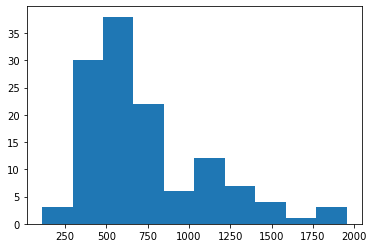

In [5]:
plt.hist(np.array(out.loc[(out.Participant_ID == 12) & (out.Sentence_ID == "9")].IKI_timings.tolist()[0]))
plt.show()

In [11]:
all([i > 0 for i in out.loc[(out.Participant_ID == 12) & (out.Sentence_ID == "9")].IKI_timings.tolist()[0]])

True